In [30]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import optuna
import h5py
import cv2
from pathlib import Path
import sys

src = Path.cwd().parent / 'src'
sys.path.append(str(src))

from models.unsupervised_models import ICA_POH
from postprocessing.postprocessing import ppg2hr_by_window

In [2]:
filepath = r'C:\Users\netan\Downloads\rPPG_results.pkl'
with open(filepath, 'rb') as f:
    results = pickle.load(f)

# Visualize Best Parameter Configurations

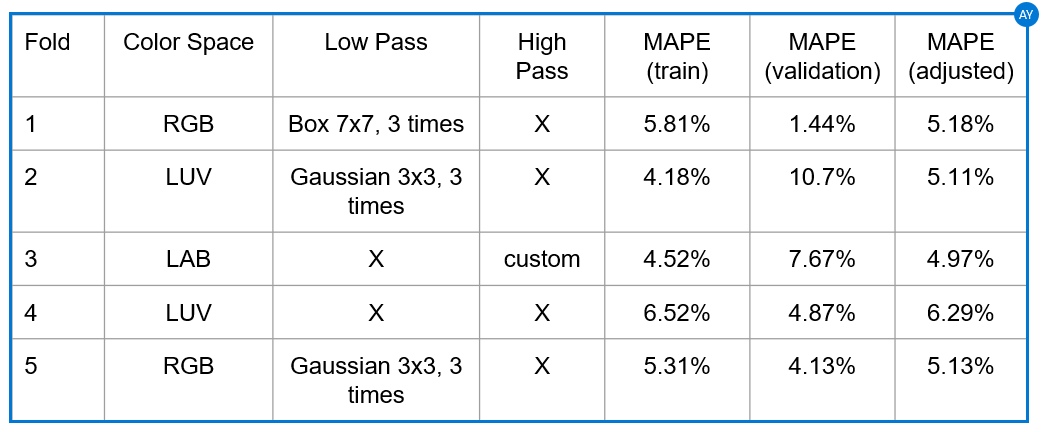

In [15]:
with h5py.File('../data/foreheads_all.h5') as f:
    print(f.keys())
    sub1 = np.array(f['subject1'])

<KeysViewHDF5 ['subject1', 'subject10', 'subject11', 'subject12', 'subject13', 'subject14', 'subject15', 'subject16', 'subject17', 'subject18', 'subject20', 'subject22', 'subject23', 'subject24', 'subject25', 'subject26', 'subject27', 'subject3', 'subject30', 'subject31', 'subject32', 'subject33', 'subject34', 'subject35', 'subject36', 'subject37', 'subject38', 'subject39', 'subject4', 'subject40', 'subject41', 'subject42', 'subject43', 'subject44', 'subject45', 'subject46', 'subject47', 'subject48', 'subject49', 'subject5', 'subject8', 'subject9']>


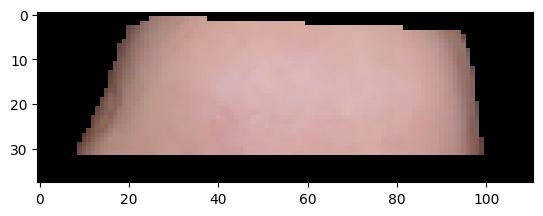

In [16]:
plt.imshow(sub1[0])

In [46]:
def combination_1(frames):
    new_frames = []
    for frame in frames:
        new_frame = frame.copy()
        new_frame = cv2.blur(new_frame, (7, 7))
        new_frame = cv2.blur(new_frame, (7, 7))
        new_frame = cv2.blur(new_frame, (7, 7))
        new_frames.append(new_frame)
    return np.array(new_frames)

def combination_2(frames):
    new_frames = []
    for frame in frames:
        new_frame = frame.copy()
        new_frame = cv2.cvtColor(new_frame, cv2.COLOR_RGB2Luv)
        new_frame = cv2.GaussianBlur(new_frame, (3, 3), 0)
        new_frame = cv2.GaussianBlur(new_frame, (3, 3), 0)
        new_frame = cv2.GaussianBlur(new_frame, (3, 3), 0)
        new_frames.append(new_frame)
    return np.array(new_frames)

def combination_3(frames):
    return frames

def combination_4(frames):
    new_frames = []
    for frame in frames:
        new_frame = frame.copy()
        new_frame = cv2.cvtColor(new_frame, cv2.COLOR_RGB2Luv)
        new_frames.append(new_frame)
    return np.array(new_frames)


def combination_5(frames):
    new_frames = []
    for frame in frames:
        new_frame = frame.copy()
        new_frame = cv2.GaussianBlur(new_frame, (3, 3), 0)
        new_frame = cv2.GaussianBlur(new_frame, (3, 3), 0)
        new_frame = cv2.GaussianBlur(new_frame, (3, 3), 0)
        new_frames.append(new_frame)
    return np.array(new_frames)

combinations = {'combination 1': combination_1,
                'combination 2': combination_2,
                'combination 3': combination_3,
                'combination 4': combination_4,
                'combination 5': combination_5}

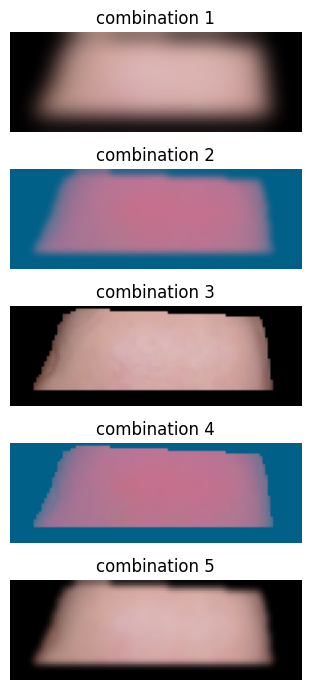

In [52]:
fig, axs = plt.subplots(5, figsize=(10, 7))

for com, ax in zip(combinations, axs):
    ax.imshow(combinations[com](sub1)[0])
    ax.axis('off')
    ax.set_title(com)

plt.tight_layout()
plt.show()

# Results Analysis

In [53]:
results_df = pd.DataFrame(results)
results_df

,trial,subject,y_true,y_hat,mape
0,0,subject49,"[87.890625, 94.921875, 91.40625, 84.375, 84.37...","[147.65625, 147.65625, 126.5625, 140.625, 140....",0.603362
1,0,subject15,"[119.53125, 119.53125, 116.015625, 108.984375,...","[144.140625, 137.109375, 144.140625, 147.65625...",0.238422
2,0,subject36,"[101.953125, 116.015625, 123.046875, 123.04687...","[147.65625, 144.140625, 137.109375, 147.65625,...",0.213597
3,0,subject10,"[94.921875, 101.953125, 116.015625, 123.046875...","[137.109375, 140.625, 133.59375, 133.59375, 14...",0.244409
4,0,subject48,"[87.890625, 87.890625, 91.40625, 91.40625, 91....","[147.65625, 147.65625, 144.140625, 126.5625, 1...",0.512967
...,...,...,...,...,...
25130,999,subject30,"[84.375, 94.921875, 105.46875, 94.921875, 101....","[84.375, 94.921875, 105.46875, 94.921875, 101....",0.000000
25131,999,subject1,"[98.4375, 108.984375, 108.984375, 108.984375, ...","[98.4375, 108.984375, 108.984375, 108.984375, ...",0.041667
25132,999,subject9,"[98.4375, 112.5, 116.015625, 112.5, 108.984375...","[91.40625, 105.46875, 112.5, 112.5, 108.984375...",0.023462
25133,999,subject26,"[98.4375, 101.953125, 98.4375, 98.4375, 98.4375]","[98.4375, 101.953125, 98.4375, 98.4375, 80.859...",0.035714


In [63]:
results_df

,trial,subject,y_true,y_hat,mape
0,0,subject49,"[87.890625, 94.921875, 91.40625, 84.375, 84.37...","[147.65625, 147.65625, 126.5625, 140.625, 140....",0.603362
1,0,subject15,"[119.53125, 119.53125, 116.015625, 108.984375,...","[144.140625, 137.109375, 144.140625, 147.65625...",0.238422
2,0,subject36,"[101.953125, 116.015625, 123.046875, 123.04687...","[147.65625, 144.140625, 137.109375, 147.65625,...",0.213597
3,0,subject10,"[94.921875, 101.953125, 116.015625, 123.046875...","[137.109375, 140.625, 133.59375, 133.59375, 14...",0.244409
4,0,subject48,"[87.890625, 87.890625, 91.40625, 91.40625, 91....","[147.65625, 147.65625, 144.140625, 126.5625, 1...",0.512967
...,...,...,...,...,...
25130,999,subject30,"[84.375, 94.921875, 105.46875, 94.921875, 101....","[84.375, 94.921875, 105.46875, 94.921875, 101....",0.000000
25131,999,subject1,"[98.4375, 108.984375, 108.984375, 108.984375, ...","[98.4375, 108.984375, 108.984375, 108.984375, ...",0.041667
25132,999,subject9,"[98.4375, 112.5, 116.015625, 112.5, 108.984375...","[91.40625, 105.46875, 112.5, 112.5, 108.984375...",0.023462
25133,999,subject26,"[98.4375, 101.953125, 98.4375, 98.4375, 98.4375]","[98.4375, 101.953125, 98.4375, 98.4375, 80.859...",0.035714


In [65]:
study_filepath = r'C:\Users\netan\Downloads\rPPG_study.pkl'
with open(study_filepath, 'rb') as f:
    study = pickle.load(f)

In [66]:
study_df = study.trials_dataframe()
study_df[study_df.value < .1].params_color_space.value_counts()

params_color_space
Luv    604
RGB     47
Lab     34
YUV     20
Name: count, dtype: int64

In [78]:
study_df

,number,value,datetime_start,datetime_complete,duration,params_HPF,params_LPF,params_base,params_blur,params_color_space,...,params_kernel_size,params_kernel_size_high_pass,params_lambda,params_midline_increment,params_scale,params_sharpen,params_times,system_attrs_completed_rung_0,system_attrs_completed_rung_1,state
0,0,0.462140,2024-03-04 20:31:49.766862,2024-03-04 20:34:24.075861,0 days 00:02:34.308999,0.924872,3.153491,NaN,box,Luv,...,7.0,7.0,111.805032,NaN,NaN,NaN,1.930783,NaN,NaN,COMPLETE
1,1,0.205403,2024-03-04 20:34:24.086473,2024-03-04 20:36:17.226741,0 days 00:01:53.140268,0.405862,1.768047,NaN,box,HLS,...,5.0,NaN,80.380027,NaN,NaN,NaN,2.912484,0.356004,0.212148,COMPLETE
2,2,0.432899,2024-03-04 20:36:17.229738,2024-03-04 20:37:54.888740,0 days 00:01:37.659002,4.598121,4.374784,NaN,box,HLS,...,7.0,NaN,130.898151,NaN,NaN,NaN,4.158263,0.441366,NaN,COMPLETE
3,3,0.337118,2024-03-04 20:37:54.891738,2024-03-04 20:39:44.931738,0 days 00:01:50.040000,3.480112,0.649843,NaN,gaussian,YUV,...,9.0,3.0,170.686954,NaN,NaN,NaN,3.598355,0.299729,0.337118,PRUNED
4,4,0.420203,2024-03-04 20:39:44.933737,2024-03-04 20:41:19.143740,0 days 00:01:34.210003,3.905005,3.676154,0.715862,median,RGB,...,3.0,5.0,140.399788,-3.852934,0.022671,True,1.793882,0.426665,NaN,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.099360,2024-03-05 13:50:57.285662,2024-03-05 13:51:24.049701,0 days 00:00:26.764039,4.443637,1.204800,NaN,None,Luv,...,NaN,NaN,85.735128,NaN,NaN,NaN,NaN,0.099360,NaN,PRUNED
996,996,0.063434,2024-03-05 13:51:24.051702,2024-03-05 13:52:37.896811,0 days 00:01:13.845109,4.738918,0.730438,NaN,None,Luv,...,NaN,NaN,59.478258,NaN,NaN,NaN,NaN,0.063434,NaN,PRUNED
997,997,0.053353,2024-03-05 13:52:37.898812,2024-03-05 13:53:07.187856,0 days 00:00:29.289044,4.594145,0.960041,NaN,box,RGB,...,3.0,NaN,82.726575,NaN,NaN,NaN,4.481519,0.053353,NaN,PRUNED
998,998,0.050636,2024-03-05 13:53:07.189856,2024-03-05 13:54:25.075971,0 days 00:01:17.886115,4.747176,1.023901,NaN,None,Lab,...,NaN,NaN,70.934505,NaN,NaN,NaN,NaN,0.035112,0.044671,COMPLETE


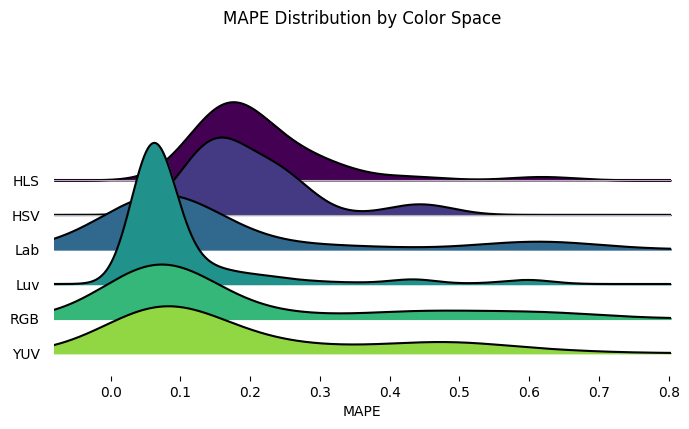

In [77]:
import joypy
from matplotlib import cm

fig, ax = joypy.joyplot(study_df[['params_color_space', 'value']], by='params_color_space',
              colormap=cm.viridis, fade=False, grid='y', overlap=2, figsize=(7, 4),
              );
plt.xlabel('MAPE')
plt.title('MAPE Distribution by Color Space')
plt.show()

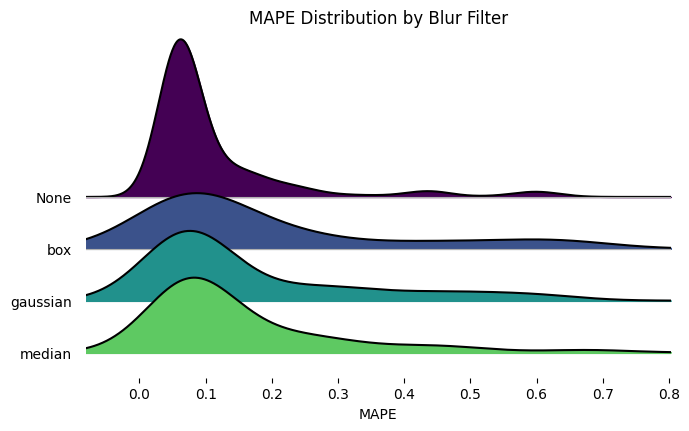

In [91]:
fig, ax = joypy.joyplot(study_df[['params_blur', 'value']].fillna('None'), by='params_blur',
                        colormap=cm.viridis, fade=False, grid='y', overlap=2, figsize=(7, 4),
                        
                        )
plt.xlabel('MAPE')
plt.title('MAPE Distribution by Blur Filter')
plt.show()

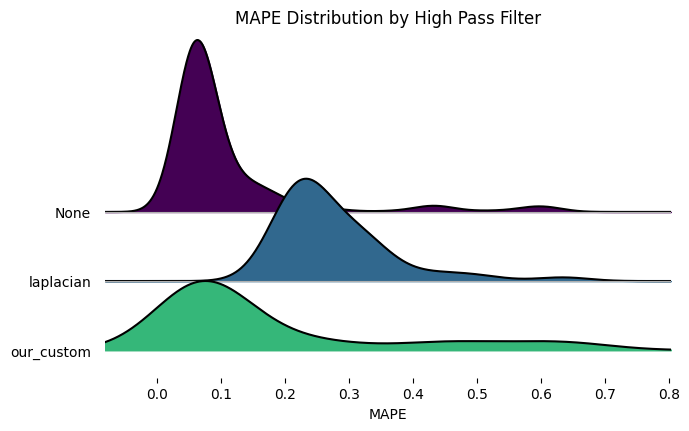

In [92]:
fig, ax = joypy.joyplot(study_df[['params_high_pass', 'value']].fillna('None'), by='params_high_pass',
                        colormap=cm.viridis, fade=False, grid='y', overlap=2, figsize=(7, 4),
                        )
plt.xlabel('MAPE')
plt.title('MAPE Distribution by High Pass Filter')
plt.show()

c:\Users\netan\miniconda3\envs\image_processing_project\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


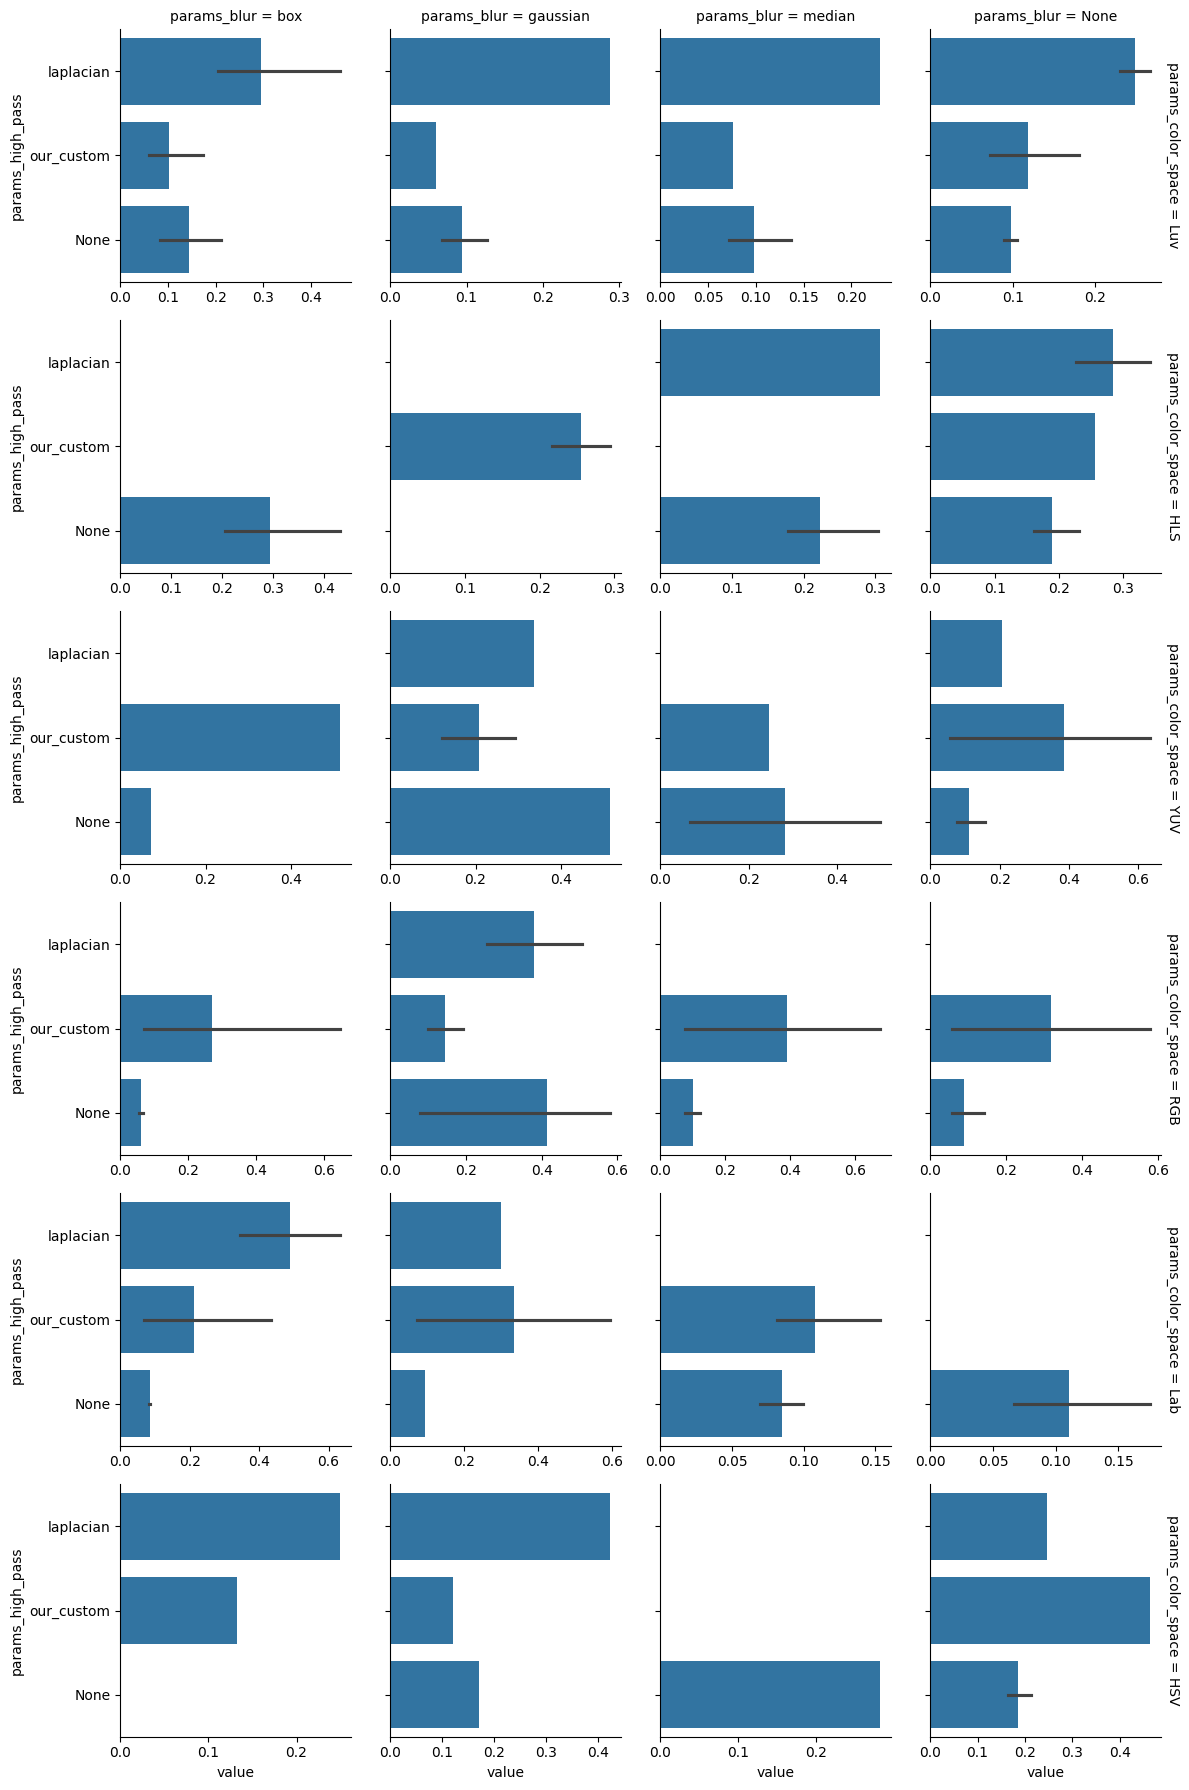

In [105]:
g = sns.FacetGrid(study_df.fillna('None'), row='params_color_space', col='params_blur',
                  sharex=False, sharey=True, margin_titles=True, )
g.map(sns.barplot, 'value', 'params_high_pass')
plt.tight_layout()

In [11]:
import optuna.visualization as vis

vis.plot_intermediate_values(study)
# vis.plot_optimization_history(study)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'maxdisplayed': 10},
              'mode': 'lines+markers',
              'name': 'Trial0',
              'type': 'scatter',
              'x': [0, 1, 2, 3],
              'y': [0.6087250712250712, 0.6567471532855612, 0.5175729783801606,
                    0.47083908983221756]},
             {'marker': {'maxdisplayed': 10},
              'mode': 'lines+markers',
              'name': 'Trial1',
              'type': 'scatter',
              'x': [0, 1, 2, 3],
              'y': [0.3820750237416904, 0.3560042888189033, 0.2500234773171264,
                    0.2121484356539123]},
             {'marker': {'maxdisplayed': 10},
              'mode': 'lines+markers',
              'name': 'Trial2',
              'type': 'scatter',
              'x': [0, 1, 2, 3],
              'y': [0.5023029439696106, 0.607955928204457, 0.49156094224151237,
                    0.4413656577430065]},
             {'marker': {'maxdisplayed': 10},
              'mode': 'lines+markers',
              'name': 'Trial3',
              'type': 'scatter',
              'x': [0, 1, 2, 3],
              'y': [0.2168803418803419, 0.29972905524416865, 0.324684282044037,
                    0.3371183740191765]},
             {'marker': {'maxdisplayed': 10},
              'mode': 'lines+markers',
              'name': 'Trial4',
              'type': 'scatter',
              'x': [0, 1, 2, 3],
              'y': [0.5521011396011396, 0.5795541221374821, 0.4700904937080339,
                    0.4266650095964602]},
             {'marker': {'maxdisplayed': 10},
              'mode': 'lines+markers',
              'name': 'Trial5',
              'type': 'scatter',
              'x': [0, 1],
              'y': [0.559045584045584, 0.6344625422265744]},
             {'marker': {'maxdisplayed': 10},
              'mode': 'lines+markers',
              'name': 'Trial6',
              'type': 'scatter',
              'x': [0, 1, 2, 3],
              'y': [0.5804131054131054, 0.6197661692965682, 0.5016657179754519,
                    0.45500830681045606]},
             {'marker': {'maxdisplayed': 10},
              'mode': 'lines+markers',
              'name': 'Trial7',
              'type': 'scatter',
              'x': [0, 1],
              'y': [0.45658119658119656, 0.5167261805034888]},
             {'marker': {'maxdisplayed': 10},
              'mode': 'lines+markers',
              'name': 'Trial8',
              'type': 'scatter',
              'x': [0, 1, 2, 3],
              'y': [0.6439411206077873, 0.6721113668269459, 0.5479207290400252,
                    0.4966514508341596]},
             {'marker': {'maxdisplayed': 10},
              'mode': 'lines+markers',
              'name': 'Trial9',
              'type': 'scatter',
              'x': [0, 1, 2, 3],
              'y': [0.4838651471984805, 0.4482835415616863, 0.31180250752419586,
                    0.2502613897400872]},
             {'marker': {'maxdisplayed': 10},
              'mode': 'lines+markers',
              'name': 'Trial10',
              'type': 'scatter',
              'x': [0, 1, 2, 3],
              'y': [0.057454890788224126, 0.2446198151594645, 0.2455954795102217,
                    0.2424149438052162]},
             {'marker': {'maxdisplayed': 10},
              'mode': 'lines+markers',
              'name': 'Trial11',
              'type': 'scatter',
              'x': [0, 1, 2, 3],
              'y': [0.11006172839506173, 0.2028008408782979, 0.12105967541351483,
                    0.09285430097894248]},
             {'marker': {'maxdisplayed': 10},
              'mode': 'lines+markers',
              'name': 'Trial12',
              'type': 'scatter',
              'x': [0, 1, 2, 3],
              'y': [0.006172839506172839, 0.06964964784029447,
                    0.05885146291798074, 0.05460944779311175]},
             {'marker': {'maxdisplayed': 10},
              'mode': 'lines+markers',
              'name': 'Trial13',
              'type': 's

In [6]:
new_filepath = r'C:\Users\netan\Downloads\rPPG_Study_cv_results.pkl'
with open(new_filepath, 'rb') as f:
    new_results = pickle.load(f)

In [8]:
new_results_df = pd.DataFrame(new_results)
new_results_df

,fold_data,results,study
0,"{'train': ['subject37', 'subject14', 'subject4...","[{'trial': 0, 'subset': 'train', 'params': {'c...",<optuna.study.study.Study object at 0x0000023A...
1,"{'train': ['subject49', 'subject15', 'subject3...","[{'trial': 0, 'subset': 'train', 'params': {'c...",<optuna.study.study.Study object at 0x0000023A...
2,"{'train': ['subject49', 'subject15', 'subject3...","[{'trial': 0, 'subset': 'train', 'params': {'c...",<optuna.study.study.Study object at 0x0000023A...
3,"{'train': ['subject49', 'subject15', 'subject3...","[{'trial': 0, 'subset': 'train', 'params': {'c...",<optuna.study.study.Study object at 0x0000023A...
4,"{'train': ['subject49', 'subject15', 'subject3...","[{'trial': 0, 'subset': 'train', 'params': {'c...",<optuna.study.study.Study object at 0x0000023A...


In [ ]:
def evaluate_on_entire_dataset(params):
    for subject in subjects:
        

In [17]:
for i, study in enumerate(new_results_df.study):
    print(f'fold {i + 1} best parameters:')
    print(study.best_params)
    # here calculate the MAPE for the entire dataset using study.best_params
    params_results = evaluate_on_entire_dataset(study.best_params)
    print()

fold 1 best parameters:
{'color_space': 'RGB', 'blur': 'box', 'kernel_size': 7, 'times': 2.3440009243589093, 'high_pass': None, 'lambda': 52.24996199225873, 'LPF': 1.0264429916056717, 'HPF': 4.572394290425373}

fold 2 best parameters:
{'color_space': 'RGB', 'blur': 'gaussian', 'kernel_size': 3, 'times': 2.8551484181315865, 'high_pass': None, 'lambda': 85.82644041481346, 'LPF': 1.385990821841137, 'HPF': 3.4159464230879273}

fold 3 best parameters:
{'color_space': 'RGB', 'blur': None, 'high_pass': None, 'lambda': 64.61005429531875, 'LPF': 1.0644782775005812, 'HPF': 4.580565668743752}

fold 4 best parameters:
{'color_space': 'RGB', 'blur': None, 'high_pass': None, 'lambda': 130.65762447888972, 'LPF': 1.1698923346400187, 'HPF': 2.185542438277423}

fold 5 best parameters:
{'color_space': 'RGB', 'blur': 'median', 'kernel_size': 3, 'times': 1.5560521125506481, 'high_pass': None, 'lambda': 191.76717650720587, 'LPF': 1.1300499640173536, 'HPF': 3.298158559368826}



In [ ]:
def transform(frames, color_space, blur, high_pass, low_pass, kernel_size, ):

               # color spaces
               if color_space == 'RGB':  # default input
                    pass
                if color_space == 'HSV':
                    for i, frame in enumerate(frames):
                        new_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
                        frames[i] = new_frame

                if color_space == 'Lab':

                    for i, frame in enumerate(frames):
                        new_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2Lab)
                        frames[i] = new_frame

                if color_space == 'Luv':

                    for i, frame in enumerate(frames):
                        new_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2Luv)
                        frames[i] = new_frame

                if color_space == 'HLS':

                    for i, frame in enumerate(frames):
                        new_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2HLS)
                        frames[i] = new_frame

                if color_space == 'YUV':

                    for i, frame in enumerate(frames):
                        new_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2YUV)
                        frames[i] = new_frame


                # blur types
                if blur is not None:


                    for t in np.arange(times):
                        if blur == 'box':

                            for i, frame in enumerate(frames):
                                new_frame = cv2.blur(frame, (kernel_size,kernel_size))
                                frames[i] = new_frame


                        if blur == 'median':

                            for i, frame in enumerate(frames):
                                new_frame = cv2.medianBlur(frame, kernel_size)
                                frames[i] = new_frame


                        if blur == 'gaussian':

                            for i, frame in enumerate(frames):
                                new_frame = cv2.GaussianBlur(frame, (kernel_size,kernel_size),0)
                                frames[i] = new_frame


                if high_pass is not None:

                    if high_pass == 'our_custom':



                        custom_filter = np.zeros([k,k])

                        axis_2 = int((k-1)/2)

                        quarter = np.zeros([axis_2, axis_2])

                        for i in np.arange(axis_2):

                            for j in np.arange(axis_2):

                                quarter[j,i] = -(base+(i+j)*scale)

                        midline = quarter[axis_2-1] + midline_increment



                        custom_filter[:axis_2, :axis_2] = quarter

                        custom_filter[axis_2+1:, :axis_2] = np.flip(quarter,axis=0)

                        custom_filter[axis_2+1:, axis_2+1:] =  -1*np.flip(np.flip(quarter,axis=0),axis=1)

                        custom_filter[:axis_2, axis_2+1:] = -1*np.flip(quarter,axis=1)

                        custom_filter[axis_2,axis_2+1:] =  -1 * np.flip(midline)
                        custom_filter[axis_2, :axis_2] = midline

                        if sharpen:
                            custom_filter[axis_2+1, axis_2+1] = 1

                        if flip:
                            custom_filter = custom_filter.T

                        for i, frame in enumerate(frames):
                            new_frame = cv2.filter2D(src=frame, ddepth=-1, kernel=custom_filter)

                    if high_pass == 'laplacian':

                        for i, frame in enumerate(frames):
                            new_frame = cv2.Laplacian(frame, cv2.CV_64F, ksize=k)
                            frames[i] = new_frame

                # if transform is not None:

                #     transform types

                #     if transform == 'histogram_equalization':

                #         for i, frame in enumerate(frames):

                #             colorimage_b = cv2.equalizeHist(frame[:,:,0])
                #             colorimage_g = cv2.equalizeHist(frame[:,:,1])
                #             colorimage_r = cv2.equalizeHist(frame[:,:,2])

                #             # Next we stack our equalized channels back into a single image
                #             colorimage_e = np.stack((colorimage_b,colorimage_g,colorimage_r), axis=2)
                #             frames[i] = colorimage_e





                return frames

In [ ]:
for i, study in enumerate(new_results_df.study):
    print(f'fold {i + 1} best parameters:')
    print(study.best_params)
    print()

In [13]:
study.__dir__()

['study_name',
 '_study_id',
 '_storage',
 '_directions',
 'sampler',
 'pruner',
 '_stop_flag',
 '_thread_local',
 '__module__',
 '__doc__',
 '__init__',
 '__getstate__',
 '__setstate__',
 'best_params',
 'best_value',
 'best_trial',
 'best_trials',
 'direction',
 'directions',
 'trials',
 'get_trials',
 '_get_trials',
 'user_attrs',
 'system_attrs',
 'metric_names',
 'optimize',
 'ask',
 'tell',
 'set_user_attr',
 'set_system_attr',
 'trials_dataframe',
 'stop',
 'enqueue_trial',
 'add_trial',
 'add_trials',
 'set_metric_names',
 '_is_multi_objective',
 '_pop_waiting_trial_id',
 '_should_skip_enqueue',
 '_ask',
 '_tell',
 '_log_completed_trial',
 '__dict__',
 '__weakref__',
 '__new__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']